# 離散化の考え方

## ボールの軌道

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
g  = 9.8
v0 = 10
h0 = 0
dt = .1

In [2]:

plt.figure(figsize = (5, 5), dpi = 100)
plt.rcParams["font.size"] = 16

# 解析解
t = np.linspace(0, 2 * v0 / g, 100)
# ニュートンの第二法則より
h = -0.5 * g * t ** 2 + v0 * t + h0 
# これでpltのオブジェクトがハンドリングができるらしい・・・
la, = plt.plot(t, h, color = "blue") 

# 数値解
t = 0
h = h0
while h >= h0:
    # 都度都度でプロットをしている
    ln  = plt.scatter(t, h, marker = "o", c = "black") 
    h  += (-g * t + v0) * dt
    t  += dt

# グラフの後処理
plt.grid(color = "black", linestyle = "dashed", linewidth = .5)
plt.xlabel("Time")
plt.ylabel("Height")
# ラベルを使わないならば，la, lnはオブジェクトに保存しておかなくても良いきがする
plt.legend(handles = [la, ln], labels = ["Analytical", "Numerical"])
plt.show()

NameError: name 'v0' is not defined

大きくずれているように見える。
これに対して，$dt=.02$で計算してみる. 

In [ ]:
g  = 9.8
v0 = 10
h0 = 0
dt = .02

In [ ]:

plt.figure(figsize = (5, 5), dpi = 100)
plt.rcParams["font.size"] = 16

# 解析解
t = np.linspace(0, 2 * v0 / g, 100)
# ニュートンの第二法則より
h = -0.5 * g * t ** 2 + v0 * t + h0 
# これでpltのオブジェクトがハンドリングができるらしい・・・
la, = plt.plot(t, h, color = "blue") 

# 数値解
t = 0
h = h0
while h >= h0:
    # 都度都度でプロットをしている
    ln  = plt.scatter(t, h, marker = "o", c = "black") 
    h  += (-g * t + v0) * dt
    t  += dt

# グラフの後処理
plt.grid(color = "black", linestyle = "dashed", linewidth = .5)
plt.xlabel("Time")
plt.ylabel("Height")
# ラベルを使わないならば，la, lnはオブジェクトに保存しておかなくても良いきがする
plt.legend(handles = [la, ln], labels = ["Analytical", "Numerical"])
plt.show()

一方で，微分値を$t_1,t_2$の中間点の値を使う。これは$dt$の幅を小さくしても，まったく正確な値になる. 

In [ ]:
g  = 9.8
v0 = 10
h0 = 0
dt = .1

plt.figure(figsize = (5, 5), dpi = 100)
plt.rcParams["font.size"] = 16

# 解析解
t = np.linspace(0, 2 * v0 / g, 100)
# ニュートンの第二法則より
h = -0.5 * g * t ** 2 + v0 * t + h0 
# これでpltのオブジェクトがハンドリングができるらしい・・・
la, = plt.plot(t, h, color = "blue") 

# 数値解
t = 0
h = h0
while h >= h0:
    # 都度都度でプロットをしている
    ln  = plt.scatter(t, h, marker = "o", c = "black") 
    h  += (-g * (t + dt/2) + v0) * dt
    t  += dt

# グラフの後処理
plt.grid(color = "black", linestyle = "dashed", linewidth = .5)
plt.xlabel("Time")
plt.ylabel("Height")
# ラベルを使わないならば，la, lnはオブジェクトに保存しておかなくても良いきがする
plt.legend(handles = [la, ln], labels = ["Analytical", "Numerical"])
plt.show()

# スカラー移流方程式

## FTCS

In [16]:
c = 1
dt = .05
dx = .1
jmax = 21
nmax = 6

x    = np.linspace(0, dx * (jmax - 1), jmax)
q    = np.zeros((nmax, jmax))
q[0] = np.where(x <= dx * jmax / 2, 1, 0)

for i in range(1, nmax):
    q[i, 0]    = q[i-1, 0]
    q[i, jmax-1] = q[i-1, jmax-1]
    for k in range(1, jmax-1):
        q[i, k] = q[i-1, k] - c * dt / dx * (q[i-1,k+1] - q[i-1,k-1])




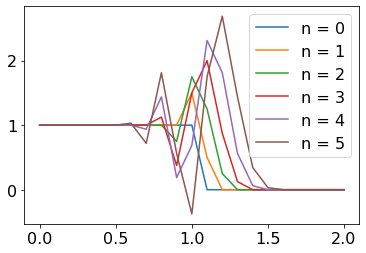

In [20]:
for i, y in enumerate(q):
    plt.plot(x, y, label = f"n = {i}")
plt.legend()

上記の例だと輸送方程式なのに，値が変わってしまっている．

風上差分になるように1次後退差分を使う. 

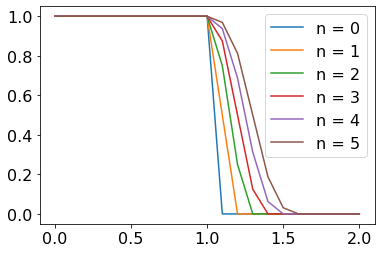

In [22]:
c = 1
dt = .05
dx = .1
jmax = 21
nmax = 6

x    = np.linspace(0, dx * (jmax - 1), jmax)
q    = np.zeros((nmax, jmax))
q[0] = np.where(x <= dx * jmax / 2, 1, 0)

for i in range(1, nmax):
    q[i, 0]    = q[i-1, 0]
    q[i, jmax-1] = q[i-1, jmax-1]
    for k in range(1, jmax-1):
        q[i, k] = q[i-1, k] - c * dt / dx * (q[i-1,k] - q[i-1,k-1])

for i, y in enumerate(q):
    plt.plot(x, y, label = f"n = {i}")
plt.legend()

In [23]:
def simulation_advection_1d(dt, dx):
    c = 1
    jmax = 21
    nmax = 6

    x    = np.linspace(0, dx * (jmax - 1), jmax)
    q    = np.zeros((nmax, jmax))
    q[0] = np.where(x <= dx * jmax / 2, 1, 0)

    for i in range(1, nmax):
        q[i, 0]      = q[i-1, 0]
        q[i, jmax-1] = q[i-1, jmax-1]
        for k in range(1, jmax-1):
            q[i, k] = q[i-1, k] - c * dt / dx * (q[i-1,k] - q[i-1,k-1])

    return (x, q)

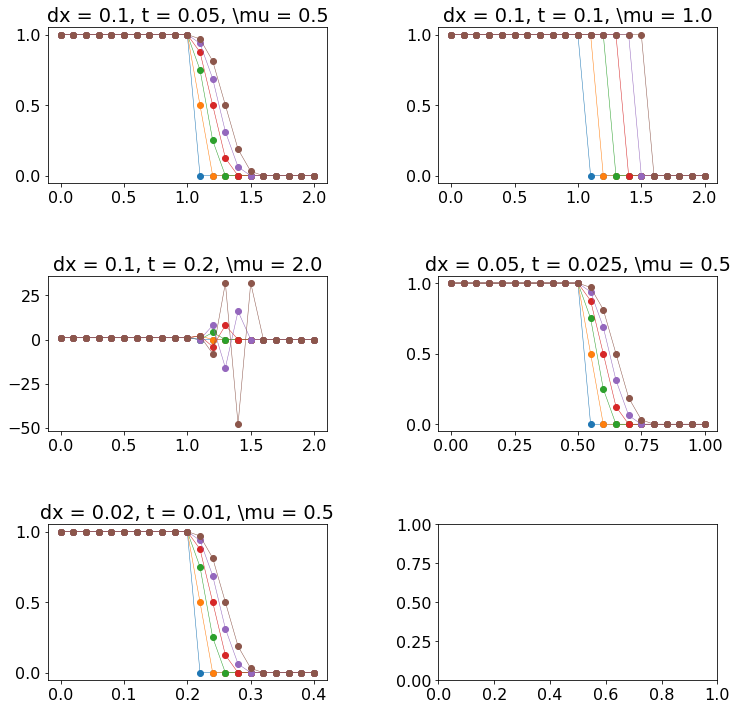

In [48]:
fig, axs  = plt.subplots(3, 2, figsize = (12, 12))

x = [.1, .1, .1, .05, .02]
t = [.05, .1, .2, .025, .01]
for dx, dt, ax in zip(x, t, axs.ravel()):
    x, q = simulation_advection_1d(dt, dx)
    for y in q:
        ax.plot(x, y, marker = "o", linewidth=.5)
        ax.set_title(f"dx = {dx}, t = {dt}, mu = {c * dt/dx}")

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()
        